In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('/content/adult.csv')

Overview of dataset

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.shape

(38818, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38818 entries, 0 to 38817
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              38818 non-null  int64  
 1   workclass        38818 non-null  object 
 2   fnlwgt           38818 non-null  int64  
 3   education        38818 non-null  object 
 4   educational-num  38818 non-null  int64  
 5   marital-status   38818 non-null  object 
 6   occupation       38818 non-null  object 
 7   relationship     38818 non-null  object 
 8   race             38817 non-null  object 
 9   gender           38817 non-null  object 
 10  capital-gain     38817 non-null  float64
 11  capital-loss     38817 non-null  float64
 12  hours-per-week   38817 non-null  float64
 13  native-country   38817 non-null  object 
 14  income           38817 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 4.4+ MB


In [9]:
df.isna().sum().sum()

7

In [10]:
num = list(df.select_dtypes(include = np.number).columns)
cat = list(df.select_dtypes(include = 'object').columns)

In [11]:
colorscale = [[0, '#C71585'],[.5, '#FF1493'],[1, '#FF69B4']]
fig = ff.create_table(round(df[num].describe().reset_index(), 2), font_colors = ['white'], colorscale = colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 15
    
fig.update_layout(
    title_text = 'Descriptive Statistics on the numerical columns',
    margin = {'t':50},
    template= "plotly_dark"
)
    
fig.show(renderer="colab")

In [12]:


colorscale = [[0, '#C71585'],[.5, '#FF1493'],[1, '#FF69B4']]
fig = ff.create_table(df[cat].describe().reset_index(), font_colors = ['white'], colorscale = colorscale)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10
    
fig.update_layout(
    title_text = 'Statistics of the categorical columns',
    margin = {'t':50},
    template= "plotly_dark"
)
    
fig.show(renderer="colab")



Univarate Analysis

In [13]:
fig = ff.create_distplot([df['age']],group_labels =['age_density'], colors = ['#00FFFF'])

fig.add_trace(go.Box(x = df['age'],
                    xaxis='x2', yaxis='y2', 
                     name = 'age_distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the age column',
    margin = {'t':50, 'b':100},
    template= "plotly_dark"
)


fig.show(renderer="colab")

In [14]:
print('Total number of adults in the record is:', df.shape[0])
print('Number of working adults working after the age of 65 is:',df[df['age'] > 65].shape[0])

Total number of adults in the record is: 38818
Number of working adults working after the age of 65 is: 1465


In [15]:
df = df[df['age'] <= 65] # Removing the records having age of more than 65

In [16]:
fig = ff.create_distplot([df['age']],group_labels =['age_density'], colors = ['#00FFFF'])

fig.add_trace(go.Box(x = df['age'],
                    xaxis='x2', yaxis='y2', 
                     name = 'age_distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the age column after outlier treatment',
    margin = {'t':50, 'b':10},
    template= "plotly_dark"
)


fig.show(renderer="colab")

In [17]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [18]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

In [19]:
list_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
list_2 = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th','HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

In [20]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Education','Educational-num'],
                fill_color='yellow',
                font_color = 'black',
                line_color='darkslategray',
                align='center',font_size=20),
    cells=dict(values=[list_2, list_1],
               font_color = 'black',
               fill=dict(color=['paleturquoise', '#0FFF50']),
               line_color='darkslategray',
               align='center',font_size=15))
])

fig.update_layout(
    title_text = 'Showing Corresponding value of education in educational-num column',
    # template = 'plotly_dark',
    width=700
)

fig.show(renderer="colab")

In [21]:
df['education'] = df['education'].replace(['9th','10th','11th','12th'], '9th-12th')
df['education'] = df['education'].replace(['5th-6th', '7th-8th'], '5th-8th')

In [22]:
df['educational-num'] = df['educational-num'].replace([3, 4], 3)
df['educational-num'] = df['educational-num'].replace([5, 6, 7, 8], 4)
df['educational-num'] = df['educational-num'].replace([9, 10, 11, 12, 13, 14, 15, 16], [5, 6, 7, 8, 9, 10, 11, 12])

In [23]:
df['educational-num'].unique()

array([ 4,  5,  8,  6, 11,  3,  9, 10, 12,  7,  2,  1])

In [24]:


df['education'].unique()



array(['9th-12th', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Prof-school',
       '5th-8th', 'Bachelors', 'Masters', 'Doctorate', 'Assoc-voc',
       '1st-4th', 'Preschool'], dtype=object)

In [25]:
list_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
list_2 = ['Preschool', '1st-4th', '5th-8th', '9th-12th','HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

In [26]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['Education','Educational-num'],
                fill_color='yellow',
                font_color = 'black',
                line_color='darkslategray',
                align='center',font_size=20),
    cells=dict(values=[list_2, list_1],
               font_color = 'black',
               fill=dict(color=['paleturquoise', '#0FFF50']),
               line_color='darkslategray',
               align='center',font_size=15))
])

fig.update_layout(
    title_text = 'Showing Corresponding value of education in educational-num column after<br> updating the categories',
    # template = 'plotly_dark',
    width=700
)

fig.show(renderer="colab")

In [27]:
education = pd.DataFrame(df['education'].value_counts())
education = education.reset_index()
education.columns = ['Education', 'Count']

In [28]:
colorscale = [[0, '#008000'],[.5, '#00FF00'],[1, '#20B2AA']]
fig = ff.create_table(education, colorscale = colorscale, font_colors = ['white'])

fig.add_trace(go.Bar(x= list(education.Education), 
                     y=list(education.Count), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#AAFF00'),
                    name='Count'))


fig.update_layout(
    title_text = 'Number of People having respective highest education',
    height = 1000,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'},
    template= "plotly_dark"
)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 15

fig.show(renderer="colab")

In [29]:
print('Number of records having highest education lesser than 9th is:',df[df['educational-num'] < 5].shape[0])

Number of records having highest education lesser than 9th is: 4699


In [30]:
low_education = df[df['educational-num'] < 5][['occupation', 'workclass']]

In [31]:
low_education['occupation'].unique()

array(['Machine-op-inspct', 'Other-service', 'Craft-repair',
       'Priv-house-serv', 'Exec-managerial', '?', 'Farming-fishing',
       'Sales', 'Transport-moving', 'Handlers-cleaners', 'Adm-clerical',
       'Protective-serv', 'Prof-specialty', 'Tech-support',
       'Armed-Forces'], dtype=object)

In [32]:
df[df['occupation'] == '?'].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,6,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
6,29,?,227026,HS-grad,5,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
13,58,?,299831,HS-grad,5,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
35,65,?,191846,HS-grad,5,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
75,17,?,165361,9th-12th,4,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K


In [33]:
df[df['occupation'] == '?'].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,6,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
6,29,?,227026,HS-grad,5,Never-married,?,Unmarried,Black,Male,0.0,0.0,40.0,United-States,<=50K
13,58,?,299831,HS-grad,5,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,35.0,United-States,<=50K
35,65,?,191846,HS-grad,5,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
75,17,?,165361,9th-12th,4,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K


In [34]:
print('Number of rows in which "occupation" is missing:', df[df['occupation'] == '?'].shape[0])
print('Number of rows in which "workclass" is missing:', df[df['workclass'] == '?'].shape[0])
print('Number of rows in which both "workclass" and "occupation" is missing:', df[df['workclass'] == df['occupation']].shape[0])

Number of rows in which "occupation" is missing: 1893
Number of rows in which "workclass" is missing: 1886
Number of rows in which both "workclass" and "occupation" is missing: 1886


In [35]:
for i in cat:
  if df[i].isin(['?']).any().any():
    print(i, 'has missing values')

workclass has missing values
occupation has missing values
native-country has missing values


In [36]:
print('Number of rows in which "occupation" is missing:', df[df['occupation'] == '?'].shape[0])
print('Number of rows in which "workclass" is missing:', df[df['workclass'] == '?'].shape[0])
print('Number of rows in which "native-country" is missing:', df[df['native-country'] == '?'].shape[0])
print('Number of rows in which both "workclass", "occupation" and "native-country", all are missing:', df[(df['workclass'] == '?') & (df['occupation'] == '?') & (df['native-country'] == '?')].shape[0])

Number of rows in which "occupation" is missing: 1893
Number of rows in which "workclass" is missing: 1886
Number of rows in which "native-country" is missing: 658
Number of rows in which both "workclass", "occupation" and "native-country", all are missing: 36


In [37]:
missing = df[(df['workclass'] == '?') & (df['occupation'] == '?') & (df['native-country'] == '?')]

In [38]:
missing.shape

(36, 15)

In [39]:
missing.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,?,243190,Bachelors,9,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,30.0,?,<=50K
2323,50,?,339547,Some-college,6,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0.0,50.0,?,<=50K
2584,47,?,163748,Masters,10,Divorced,?,Unmarried,White,Female,0.0,0.0,35.0,?,<=50K
2612,27,?,258231,HS-grad,5,Never-married,?,Not-in-family,White,Male,0.0,0.0,35.0,?,<=50K
2774,27,?,132372,HS-grad,5,Never-married,?,Unmarried,White,Female,0.0,0.0,40.0,?,<=50K


In [40]:
pd.crosstab(df['native-country'], df['race'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
native-country,,,,,
?,0,102,104,18,434
Cambodia,0,20,2,0,2
Canada,0,1,0,2,131
China,0,96,0,0,2
Columbia,1,0,0,7,56
Cuba,0,0,1,2,95
Dominican-Republic,0,0,13,15,53
Ecuador,0,0,1,8,25
El-Salvador,0,0,0,6,106


In [41]:
df_2 = df.drop(df[(df['workclass'] == '?') & (df['occupation'] == '?') & (df['native-country'] == '?')].index)

In [42]:


df_2.shape



(37317, 15)

In [43]:


print('Number of rows in which "occupation" is missing:', df_2[df_2['occupation'] == '?'].shape[0])
print('Number of rows in which "workclass" is missing:', df_2[df_2['workclass'] == '?'].shape[0])
print('Number of rows in which both "workclass" and "occupation" is missing:', df_2[df_2['workclass'] == df_2['occupation']].shape[0])



Number of rows in which "occupation" is missing: 1857
Number of rows in which "workclass" is missing: 1850
Number of rows in which both "workclass" and "occupation" is missing: 1850


In [44]:
df_3 = df_2.drop(df_2[df_2['occupation'] == '?'].index)
df_3.shape

(35460, 15)

In [45]:
# Analyzing with new datafrmae
print('Number of records having highest education lesser than 9th is:',df_3[df_3['educational-num'] < 3].shape[0])

Number of records having highest education lesser than 9th is: 211


In [46]:
low_education = df_3[df_3['educational-num'] < 3][['occupation', 'workclass']]

In [47]:


low_education = pd.DataFrame(low_education['occupation'].value_counts())
low_education = low_education.reset_index()
low_education.columns = ['Occupation', 'Count']



In [48]:
colorscale = [[0, '#0000ff'],[.5, '#00ffff'],[1, '#0096FF']]
fig = ff.create_table(low_education, height_constant=60, colorscale = colorscale, font_colors = ['white'])

fig.add_trace(go.Bar(x= list(low_education['Occupation']), 
                     y=list(low_education['Count']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#00FFFF'),
                    name='Views'))


fig.update_layout(
    title_text = 'Count vs Occupation of those having education lesser than 9th standard',
    height = 900,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Views'},
    template = 'plotly_dark'
)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 15

fig.show(renderer="colab")

Marital-Status

In [49]:
df_3['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [50]:
df_3['marital-status'].value_counts()

Married-civ-spouse       16389
Never-married            11753
Divorced                  4981
Separated                 1117
Widowed                    738
Married-spouse-absent      458
Married-AF-spouse           24
Name: marital-status, dtype: int64

In [51]:


df_3['marital-status'] = df_3['marital-status'].replace('Married-spouse-absent', 'Separated')



In [52]:
df_3['marital-status'] = df_3['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')

In [53]:
df_3['marital-status'] = df_3['marital-status'].replace('Never-married', 'Unmarried')

In [54]:
marital = pd.DataFrame(df_3['marital-status'].value_counts())
marital = marital.reset_index()
marital.columns = ['marital-status', 'Count']

In [55]:
colorscale = [[0, '#800080'],[.5, '#EE82EE'],[1, '#FF00FF']]
fig = ff.create_table(marital, height_constant=60, colorscale = colorscale, font_colors = ['white'])

fig.add_trace(go.Bar(x= list(marital['marital-status']), 
                     y=list(marital['Count']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#9400D3'),
                    name='Count'))


fig.update_layout(
    title_text = 'Total number of records from each Marital-Status category',
    height = 900,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'},
    template = 'plotly_dark'
)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 17

fig.show(renderer="colab")


Occupation

    Machine-op-inspct : Machine Operator Inspector
    Exec-managerial : Executive Manager



In [57]:
df_3['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [58]:


df_3['occupation'].value_counts()



Craft-repair         4769
Prof-specialty       4759
Exec-managerial      4602
Adm-clerical         4393
Sales                4212
Other-service        3772
Machine-op-inspct    2388
Transport-moving     1810
Handlers-cleaners    1584
Tech-support         1141
Farming-fishing      1088
Protective-serv       752
Priv-house-serv       177
Armed-Forces           13
Name: occupation, dtype: int64

In [59]:


df_3['occupation'] = df_3['occupation'].replace(['Armed-Forces', 'Priv-house-serv'], 'Other-service')



In [60]:
occup = pd.DataFrame(df_3['occupation'].value_counts())
occup = occup.reset_index()
occup.columns = ['Occupation', 'Count']

In [61]:
colorscale = [[0, '#E49B0F'],[.5, '#FFBF00'],[1, '#FDDA0D']]
fig = ff.create_table(occup, height_constant=60, colorscale = colorscale, font_colors = ['black'])

fig.add_trace(go.Bar(x= list(occup['Occupation']), 
                     y=list(occup['Count']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#FFEA00'),
                    name='Count'))


fig.update_layout(
    title_text = 'Total number of records from each occupation category',
    height = 900,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'},
    template = 'plotly_dark'
)

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 16

fig.show(renderer="colab")

Relationship

In [62]:


df_3['relationship'].unique()



array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative', 'Husba'], dtype=object)

In [63]:


from scipy.stats import chi2
from scipy.stats import chi2_contingency



In [64]:
pd.crosstab(df['relationship'], df['income'], margins=True)

income,<=50K,>50K,All
relationship,,,
Husband,8063,6755,14818
Not-in-family,8647,969,9616
Other-relative,1115,37,1152
Own-child,5907,92,5999
Unmarried,3707,224,3931
Wife,971,865,1836
All,28410,8942,37352


In [65]:
observed = pd.crosstab(df['relationship'], df['income'])

In [66]:
chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [67]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

9.236356899781123

In [68]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [69]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [70]:


df_3 = df_3.drop('relationship', axis = 'columns')



In [71]:
df_3['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo', nan], dtype=object)

In [72]:


df_3['race'].value_counts()



White                 30347
Black                  3379
Asian-Pac-Islander     1084
Amer-Indian-Eskimo      346
Other                   303
Name: race, dtype: int64

In [73]:


df_3['race'] = df_3['race'].replace(['Asian-Pac-Islander','Amer-Indian-Eskimo'], 'Other')



In [74]:


race = pd.DataFrame(df_3['race'].value_counts())
race = race.reset_index()
race.columns = ['race', 'Count']



In [75]:
fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}, {"type": "pie"}]]
)


fig.add_trace(go.Pie(labels=list(race.race),
                             values=list(race['Count']),
                               name='race', hole=.3),
             row = 1, col = 2)

fig.add_trace(go.Table(
    header=dict(values=list(race.columns),
                fill_color='yellow',
                align='left',
               font_color = 'black'),
    cells=dict(values=[race.race, race.Count],
               fill_color=['#00FF00', '#00BFFF'],
               align='left',
              font_color = 'black')),
             row = 1, col = 1)

fig.update_layout(margin=dict(t=50, b=0, l=0, r=10),
                 title_text = 'Total Count of people from each race',
                 template = 'plotly_dark',
                  annotations=[dict(text='race', x=0.795, y=0.5, font_size=30, showarrow=False)]
                  )


fig.show(renderer="colab")

In [76]:
df_3['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [77]:
gender = pd.DataFrame(df_3['gender'].value_counts())
gender = gender.reset_index()
gender.columns = ['Gender', 'Count']

In [78]:
fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}, {"type": "pie"}]]
)


fig.add_trace(go.Pie(labels=list(gender.Gender),
                             values=list(race['Count']),
                               name='race', hole=.3),
             row = 1, col = 2)

fig.add_trace(go.Table(
    header=dict(values=list(gender.columns),
                fill_color='yellow',
                align='left',
               font_color = 'black'),
    cells=dict(values=[gender.Gender, gender.Count],
               fill_color=['#00FF00', '#00BFFF'],
               align='left',
              font_color = 'black')),
             row = 1, col = 1)

fig.update_layout(margin=dict(t=50, b=0, l=0, r=10),
                 title_text = 'Total Count of people from each Gender',
                 template = 'plotly_dark',
                  annotations=[dict(text='Gender', x=0.81, y=0.5, font_size=30, showarrow=False)]
                  )


fig.show(renderer="colab")

In [ ]:
fig = ff.create_distplot([df_3['capital-gain']],group_labels =['capital-gain'], colors = ['#00FFFF'])

fig.add_trace(go.Box(x = df_3['capital-gain'],
                    xaxis='x2', yaxis='y2', 
                     name = 'capital_gain<br>distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the capital-gain column',
    margin = {'t':50, 'b':100},
    template= "plotly_dark"
)
fig.update_xaxes(type="log")

fig.show(renderer="colab")

In [81]:
print('Number of records with some capital gain',df_3[df_3['capital-gain'] > 0].shape[0])
print('Number of records with no capital gain', df_3[~(df_3['capital-gain'] > 0)].shape[0])

Number of records with some capital gain 2831
Number of records with no capital gain 32629


Capital loss


In [ ]:
fig = ff.create_distplot([df_3['capital-loss']],group_labels =['capital-loss'], colors = ['#00FFFF'])

fig.add_trace(go.Box(x = df_3['capital-loss'],
                    xaxis='x2', yaxis='y2', 
                     name = 'capital-loss<br>distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the capital-loss column',
    margin = {'t':50, 'b':100},
    template= "plotly_dark"
)
fig.update_xaxes(type="log")

fig.show(renderer="colab")

In [83]:
print('Number of records with some capital loss',df_3[df_3['capital-loss'] > 0].shape[0])
print('Number of records with no capital loss', df_3[~(df_3['capital-loss'] > 0)].shape[0])

Number of records with some capital loss 1675
Number of records with no capital loss 33785


In [ ]:
fig = ff.create_distplot([df_3['hours-per-week']],group_labels =['hours-per-week'], colors = ['#FFEA00'])

fig.add_trace(go.Box(x = df_3['hours-per-week'],
                    xaxis='x2', yaxis='y2', 
                     name = 'hours-per-week<br>distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the hours-per-week column',
    margin = {'t':50, 'b':100},
    template= "plotly_dark"
)
# fig.update_xaxes(type="log")

fig.show(renderer="colab")

In [85]:
def find_normal_boundaries(df, variable):
    # calculate the boundaries outside which lie the outliers for a Gaussian distribution
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    return round(upper_boundary,2), round(lower_boundary,2)

In [86]:
upper, lower = find_normal_boundaries(df_3, 'hours-per-week')

In [87]:
df_3[(df_3['hours-per-week'] < lower) | (df_3['hours-per-week'] > upper)].shape[0]

519

In [88]:
df_3.shape

(35460, 14)

In [90]:
df_3 = df_3.drop(df_3[(df_3['hours-per-week'] < lower) | (df_3['hours-per-week'] > upper)].index)

In [91]:
df_3.shape

(34941, 14)

In [ ]:
fig = ff.create_distplot([df_3['hours-per-week']],group_labels =['hours-per-week'], colors = ['#FFEA00'])

fig.add_trace(go.Box(x = df_3['hours-per-week'],
                    xaxis='x2', yaxis='y2', 
                     name = 'hours-per-week<br>distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the hours-per-week column<br> after removing outliers',
    margin = {'t':50, 'b':100},
    template= "plotly_dark"
)
# fig.update_xaxes(type="log")

fig.show(renderer="colab")

In [92]:
df_3['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'South',
       'Columbia', 'Japan', 'India', 'Cambodia', 'Poland', 'Laos',
       'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Vietnam', 'Iran', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Scotland', 'Outlying-US(Guam-USVI-etc)',
       'France', 'Holand-Netherlands', nan], dtype=object)

In [93]:
df_3['native-country'] = df_3['native-country'].replace('?', np.nan)

In [94]:
df_3['native-country'].isna().sum()

612

In [95]:


df_3['native-country'] = df_3['native-country'].fillna(df_3['native-country'].mode()[0])



In [96]:
df_3['native-country'].isna().sum()

0

In [97]:
df_3['native-country'].value_counts()[:10]

United-States    31964
Mexico             693
Philippines        213
Germany            147
Puerto-Rico        146
Canada             124
El-Salvador        106
India              105
Cuba                94
China               93
Name: native-country, dtype: int64

In [98]:
lst_1 = list(df_3['native-country'].unique())
lst_1.remove('United-States')

In [99]:
df_3['native-country'] = df_3['native-country'].replace(lst_1, 'Other')

In [100]:
native = pd.DataFrame(df_3['native-country'].value_counts())
native = native.reset_index()
native.columns = ['Country', 'Count']

In [101]:
fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}, {"type": "pie"}]]
)


fig.add_trace(go.Pie(labels=list(native.Country),
                             values=list(native['Count']),
                               name='country', hole=.3),
             row = 1, col = 2)

fig.add_trace(go.Table(
    header=dict(values=list(native.columns),
                fill_color='yellow',
                align='left',
               font_color = 'black'),
    cells=dict(values=[native.Country, native.Count],
               fill_color=['#00FF00', '#00BFFF'],
               align='left',
              font_color = 'black')),
             row = 1, col = 1)

fig.update_layout(margin=dict(t=50, b=0, l=0, r=10),
                 title_text = 'Total Count of people from country category',
                 template = 'plotly_dark',
                  annotations=[dict(text='native<br>country', x=0.82, y=0.5, font_size=30, showarrow=False)]
                  )


fig.show(renderer="colab")

In [102]:
df_3['income'].unique()

array(['<=50K', '>50K', nan], dtype=object)

In [103]:
income = pd.DataFrame(df_3['income'].value_counts())
income = income.reset_index()
income.columns = ['income', 'Count']

In [104]:


fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}, {"type": "pie"}]]
)


fig.add_trace(go.Pie(labels=list(income.income),
                             values=list(income['Count']),
                               name='income', hole=.3),
             row = 1, col = 2)

fig.add_trace(go.Table(
    header=dict(values=list(income.columns),
                fill_color='yellow',
                align='left',
               font_color = 'black'),
    cells=dict(values=[income.income, income.Count],
               fill_color=['#00FF00', '#00BFFF'],
               align='left',
              font_color = 'black')),
             row = 1, col = 1)

fig.update_layout(margin=dict(t=50, b=0, l=0, r=10),
                 title_text = 'Total Count of people from each income category',
                 template = 'plotly_dark',
                  annotations=[dict(text='income', x=0.817, y=0.5, font_size=30, showarrow=False)]
                  )


fig.show(renderer="colab")



In [105]:
fig = ff.create_distplot([df_3['fnlwgt']],group_labels =['fnlwgt_density'], colors = ['#AAFF00'])

fig.add_trace(go.Box(x = df_3['fnlwgt'],
                    xaxis='x2', yaxis='y2', 
                     name = 'fnlwgt_distribution'
                    ))

fig.update_layout(
    title_text = 'Checking density and distribution of the fnlwgt column',
    margin = {'t':50, 'b':10},
    template= "plotly_dark"
)

fig.update_xaxes(type="log")

fig.show(renderer="colab")

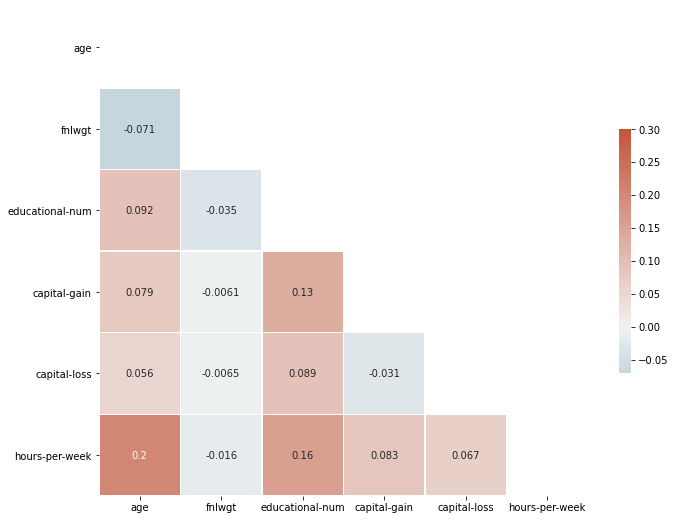

In [106]:
mask = np.triu(np.ones_like(df_3.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df_3.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()